In [29]:
#Working with a single file
import pyart
from matplotlib import pyplot as plt
import cartopy
import numpy as np
from netCDF4 import num2date
import pytz
import copy
%matplotlib inline

import imp
houston_tools = imp.load_source('houston_tools', 
                                '/Users/scollis/projects/houston/code/houston_tools.py')

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-03-18 21:23:55.302513. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [3]:
radarfile = '/data/nexrad/2017/03/17/KHGX20170317_001647_V06.ar2v'
radar = pyart.io.read(radarfile)

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-03-18 21:05:34.241883. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


min_lat: 28.5  min_lon: -96  max_lat: 30.5  max_lon: -93.6
Thursday March 16 at 07:16 PM CDT


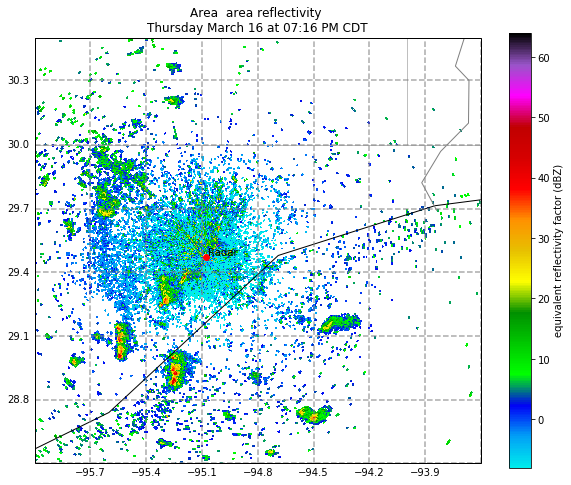

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-03-18 21:08:59.807714. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [11]:
bb={'west':-96, 'east':-93.6,'north':30.5, 'south':28.5}
disp = houston_tools.radar_plot(radar, bb=bb)

min_lat: 28.5  min_lon: -96  max_lat: 30.5  max_lon: -93.6
Thursday March 16 at 07:16 PM CDT


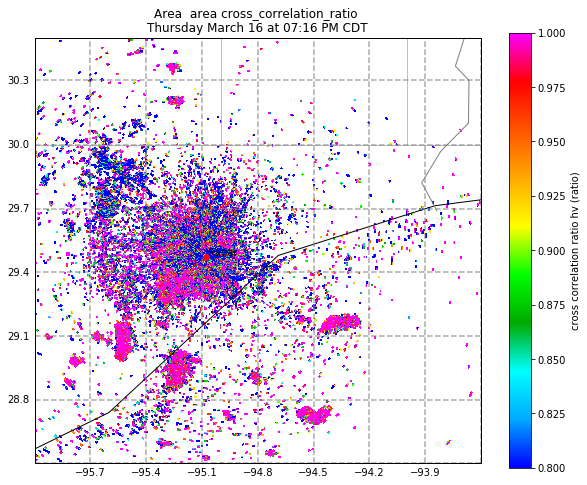

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-03-18 21:22:12.728454. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [25]:
bb={'west':-96, 'east':-93.6,'north':30.5, 'south':28.5}
disp = houston_tools.radar_plot(radar, bb=bb, field='cross_correlation_ratio',
                               vmin=.8, vmax=1.)

In [45]:
nukem = pyart.correct.GateFilter(radar)
nukem.exclude_all()
nukem.include_above('cross_correlation_ratio', 0.8)
nukem.exclude_masked('reflectivity')
filt_z = copy.deepcopy(radar.fields['reflectivity'])
filt_z['data'] = np.ma.masked_where(nukem.gate_excluded, filt_z['data'].data)
radar.add_field('filtered_reflectvity', filt_z, replace_existing=True)
cleanem = pyart.correct.despeckle.despeckle_field(radar, 'filtered_reflectvity')
cleanem.exclude_masked('filtered_reflectvity')
clean_z = copy.deepcopy(radar.fields['filtered_reflectvity'])
clean_z['data'] = np.ma.masked_where(cleanem.gate_excluded, clean_z['data'].data)
radar.add_field('clean_reflectvity', clean_z, replace_existing=True)




/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-03-18 21:33:05.524149. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


min_lat: 28.5  min_lon: -96  max_lat: 30.5  max_lon: -93.6
Thursday March 16 at 07:16 PM CDT


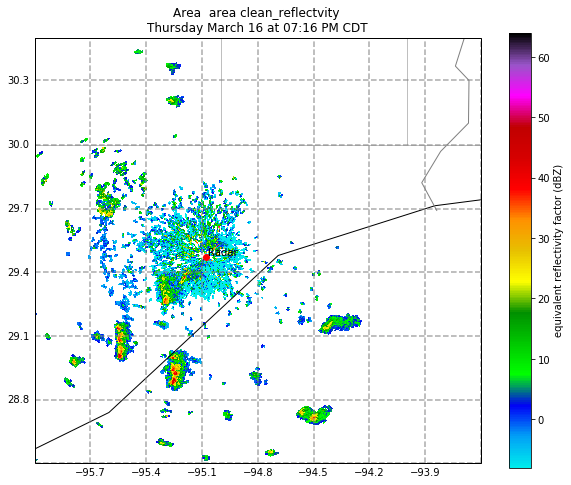

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-03-18 21:33:13.242508. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [46]:
bb={'west':-96, 'east':-93.6,'north':30.5, 'south':28.5}
disp = houston_tools.radar_plot(radar, bb=bb, field='clean_reflectvity',
                               cmap=pyart.graph.cm.NWSRef)